# Demo for burts detections

Thi notebook aims to generate a signal with known beta busts components and to apply the threshold dual (THD) method.


# Definitions


In [11]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/00_JMAO/11_PROJECTS/Project_BetaBurst/Code/"


# Import libraries

In [12]:
# -------------------------------
# Install hmmlearn
%%capture
! pip install hmmlearn


In [13]:
# -------------------------------
# Install mne
%%capture
! pip install mne


In [14]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxBurstsDetection as TBD


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generate signal

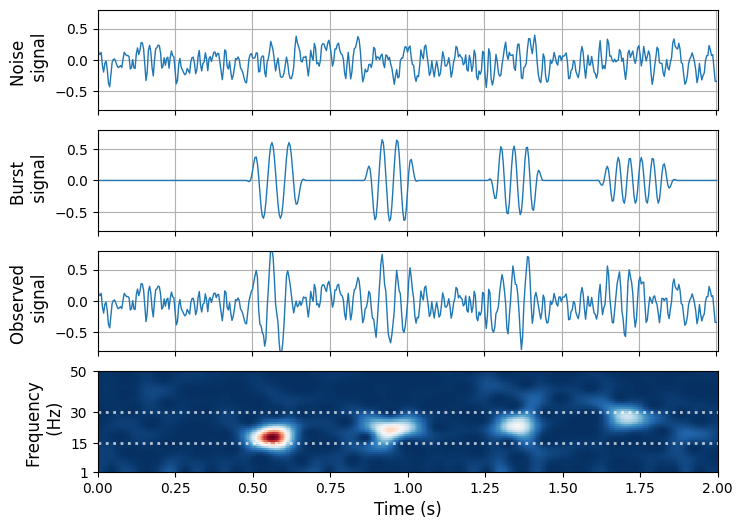

In [15]:
# -------------------------------
# Generate a signal with burts components
fs                = 256
SignalDuration    = 2.0

xraw, t, _, _, _, _, _, _ = TBD.GenerateSignalWithBurstsV1(fs, SignalDuration, True )


In [16]:
# -------------------------------
# Print signal information
print( "Data type:",type(xraw) )
print( xraw.shape )


Data type: <class 'numpy.ndarray'>
(512,)


# Threshold dual (THD) method

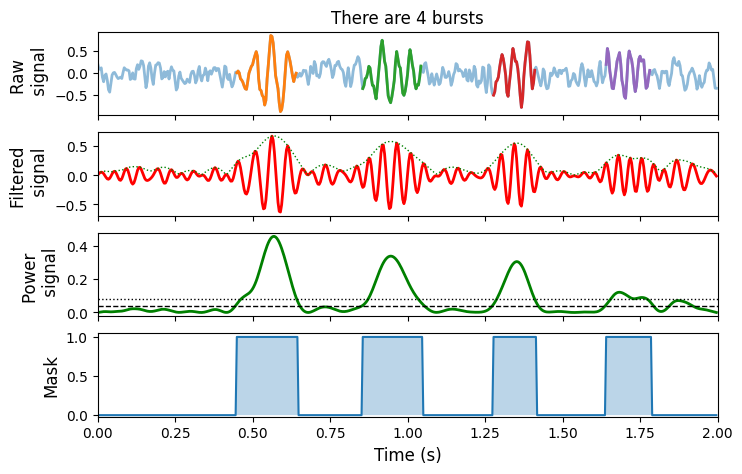

In [17]:
# -------------------------------
# Define frequency band
FrequencyBand   = [15, 29]  # Hz

# -------------------------------
# Set parameters

# Low and high factor-of-the-median thresholds
DualTHRFOM     = [ 2, 4 ]

# Minimum bursts/segment duration (i.e., eliminate segments with duration lower than this)
MinSegDur      = 50 # ms

# Define 'Amplitude' or 'Power'
Method         = 'Power'

# -------------------------------
# Burst detection using the THD method
maskTHD        = TBD.BurstDetection_THD(xraw, fs, FrequencyBand, DualTHRFOM, MinSegDur, Method, True)


There are:                4 bursts 
Burst rate:               2.0 burst/s 
 
Duration:                 [0.1953125, 0.19140625, 0.13671875, 0.14453125] s
Peak amplitude:           [0.6745327708937033, 0.5714018307421951, 0.5431874794288214, 0.34756819086186114] u
 
Peak frequency:           [19.0, 22.0, 23.0, 26.0] Hz
Peak frequency magnitude: [0.09363544266693608, 0.08214810583292262, 0.06056236113269532, 0.044240394330570525]
 


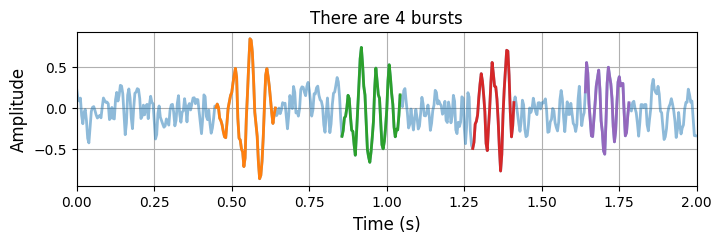

In [18]:
# -------------------------------
# Compute characteristics
charsTHD, rateTHD, _, eventsTHD = TBD.ComputeBurstCharacteristicsFromMask(maskTHD, xraw, fs, FrequencyBand, True, True )
